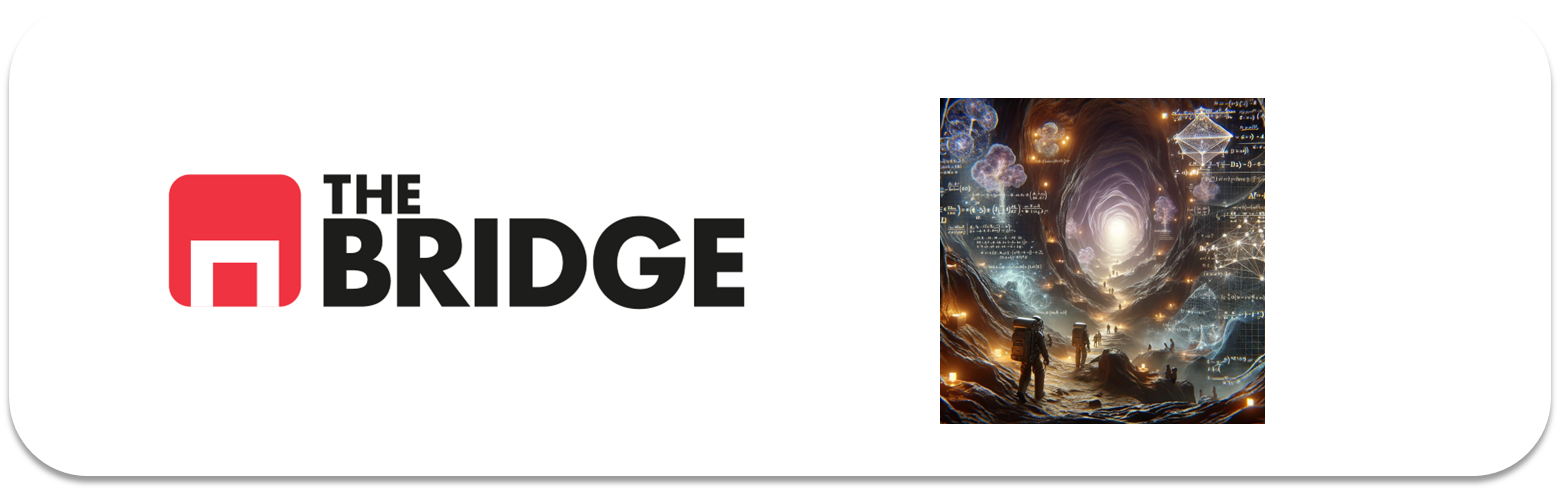

## PRACTICA OBLIGATORIA: **Introducción Deep Learning**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import PrecisionRecallDisplay



from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


pd.option_context('mode.use_inf_as_na', True)

from toolbox_DS import *
from bootcampviztools import *

### Descripción y objetivo

El objetivo de la práctica es crear un modelo DL y compararlo con un modelo Random Forest para el dataset de titanic los dos con el mismo objetivo, predecir la supervivencia de un pasajero.  Se pide:  
1. Desarrollar el proceso de ML hasta crear los dos modelos DL y Random Forest. El primero debe tener una topología MLP (es decir una red densa) con un máximo de 3 capas ocultas y debes emplear sklearn para crearlo. No es necesario hacer una análisis/seleccion exahustivo. Escoge una métrica acorde al tipo de target del problema. 

2. Ambos modelos deben tener sus hiperparámetros optimizados, mediante GridSearch. Para ello: utiliza el grid de parámetros que creas conveniente para Random Forest y para el modelo DL, utiliza un grid con los hiperparámetros siguientes:'hidden_layer_sizes','activation', 'solver','alpha' y 'learning_rate'. Para los rangos del grid del modelo de DL guíate por lo visto en el workout y por los posibles valores que se indican en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Prueba por lo menos una topología con una sola capa oculta y otra con más de una capa oculta.   
NOTA: Incluye los valores por defecto de los hiperparámetros escogidos en cada caso dentro del grid de hiperparámetros. 
  

3. Compara los modelos respecto a sus métricas medias de accuracy, precision, recall y tiempos de entrenamiento (para ello tendrás que realizar un entrenamiento a parte del mejor modelo obtenido en la optimización de hiperparámetros) y decide cuál te quedarías argumentándolo.    

4. Para el mejor modelo DL obtenido, muestra su clasification report, y la matriz de confusión comentando el resultado.


___

### 'Tradicional'
Voy a resolverlo primero de la manera que veníamos haciendo

#### Carga de datos y primer vistazo

In [5]:
df = pd.read_csv('./data/titanic.csv')
df.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df['adult_male'] = [1 if x == True else 0 for x in df['adult_male']]
df['alone']= [1 if x == True else 0 for x in df['alone']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    int64  
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


In [9]:
df.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,1,NaN,Queenstown,no,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,1,E,Southampton,no,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,0,NaN,Southampton,no,0


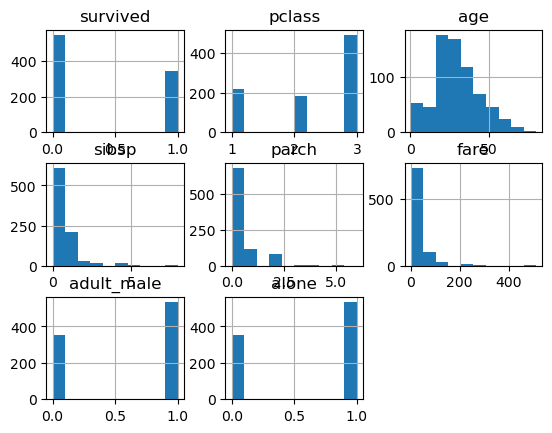

In [10]:
df.hist();

In [11]:
# Elimino columnas que no voy a utilizar
columns_exclude = ['deck','embarked','alive','adult_male']
df.drop(columns=columns_exclude,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   who          891 non-null    object 
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Variable target

<Axes: >

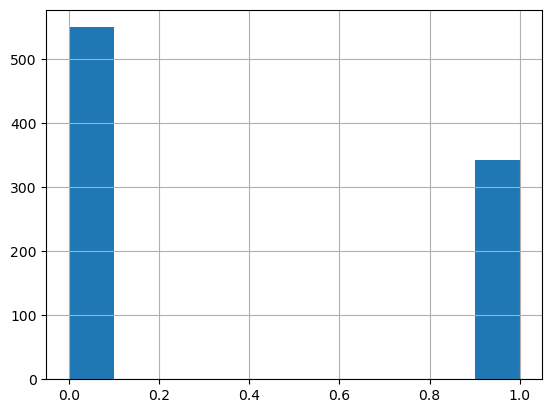

In [12]:
df['survived'].hist()

In [13]:
df['survived'].value_counts(True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [14]:
target = df['survived']

#### División en train y test

In [15]:
train_set, test_set = train_test_split(df,test_size=0.20,random_state=42)
print(train_set.shape)
print(test_set.shape)

(712, 11)
(179, 11)


#### Imputaciones

In [16]:
train_set.groupby('who')['age'].mean()


who
child     5.997681
man      33.175758
woman    31.858382
Name: age, dtype: float64

In [17]:
train_set['age_mean'] = train_set.groupby('who')['age'].transform('mean')
train_set['age'] = train_set['age'].fillna(train_set['age_mean'])
train_set.drop(columns=['age_mean'],inplace=True)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   class        712 non-null    object 
 8   who          712 non-null    object 
 9   embark_town  710 non-null    object 
 10  alone        712 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [18]:
dic_media_edad = {'child':5.99,
                  'man':33.17,
                  'woman':31.85}

def imputar_media_edad(row):
    if pd.isna(row['age']):
        return dic_media_edad[row['who']]
    else:
        return row['age']

In [19]:
test_set['age'] = test_set.apply(imputar_media_edad, axis=1)

In [20]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     179 non-null    int64  
 1   pclass       179 non-null    int64  
 2   sex          179 non-null    object 
 3   age          179 non-null    float64
 4   sibsp        179 non-null    int64  
 5   parch        179 non-null    int64  
 6   fare         179 non-null    float64
 7   class        179 non-null    object 
 8   who          179 non-null    object 
 9   embark_town  179 non-null    object 
 10  alone        179 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 16.8+ KB


In [21]:
train_set['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [22]:
train_set['embark_town']= train_set['embark_town'].fillna('Southampton')
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   class        712 non-null    object 
 8   who          712 non-null    object 
 9   embark_town  712 non-null    object 
 10  alone        712 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [23]:
columns_num = train_set.select_dtypes(include=(['int','float'])).columns.tolist()
columns_num.remove('survived')
columns_cat = train_set.select_dtypes(include=('object')).columns.tolist()
print('columnas_numericas', columns_num)
print()
print('columnas_categóricas', columns_cat)

columnas_numericas ['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']

columnas_categóricas ['sex', 'class', 'who', 'embark_town']


#### MiniEDA

#### Univariable

##### Categóricas

Para sex
*************************


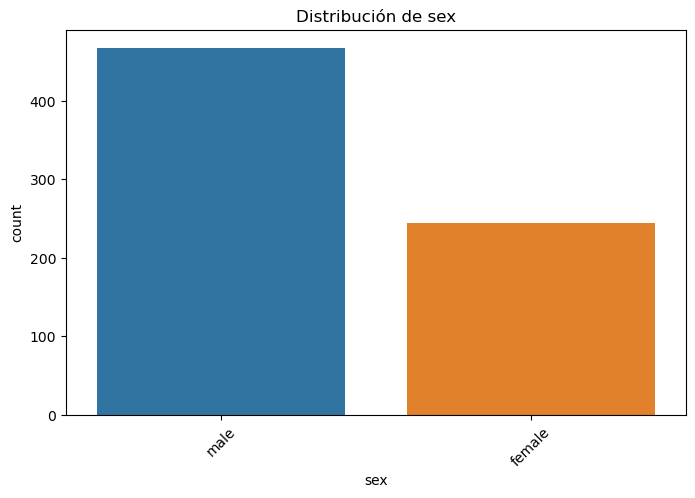

Frecuencia de categorías en sex:
sex
male      467
female    245
Name: count, dtype: int64

Porcentaje de categorías en sex:
sex
male      65.59
female    34.41
Name: proportion, dtype: float64

La moda es male con una frecuencia de 467
Proporción de la moda: 65.59%

Para class
*************************


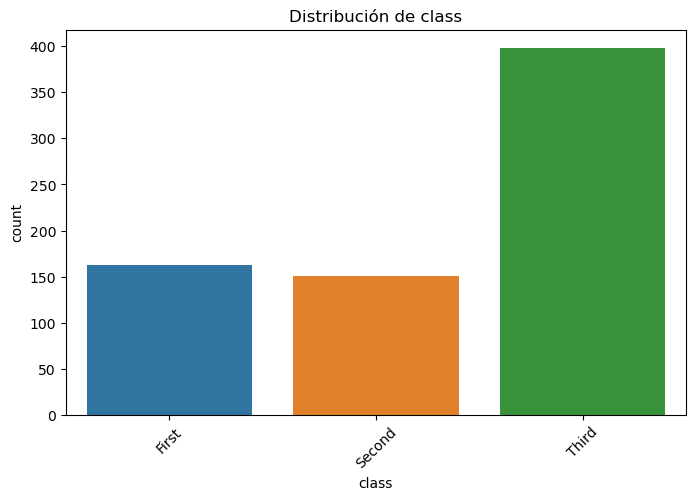

Frecuencia de categorías en class:
class
Third     398
First     163
Second    151
Name: count, dtype: int64

Porcentaje de categorías en class:
class
Third     55.90
First     22.89
Second    21.21
Name: proportion, dtype: float64

La moda es Third con una frecuencia de 398
Proporción de la moda: 55.90%

Para who
*************************


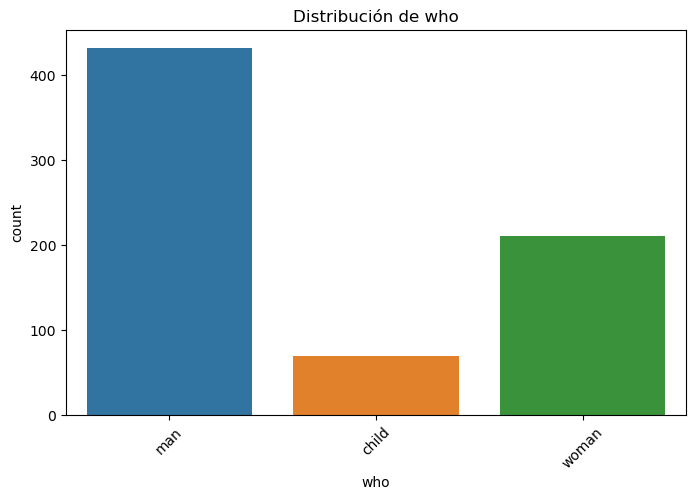

Frecuencia de categorías en who:
who
man      432
woman    211
child     69
Name: count, dtype: int64

Porcentaje de categorías en who:
who
man      60.67
woman    29.63
child     9.69
Name: proportion, dtype: float64

La moda es man con una frecuencia de 432
Proporción de la moda: 60.67%

Para embark_town
*************************


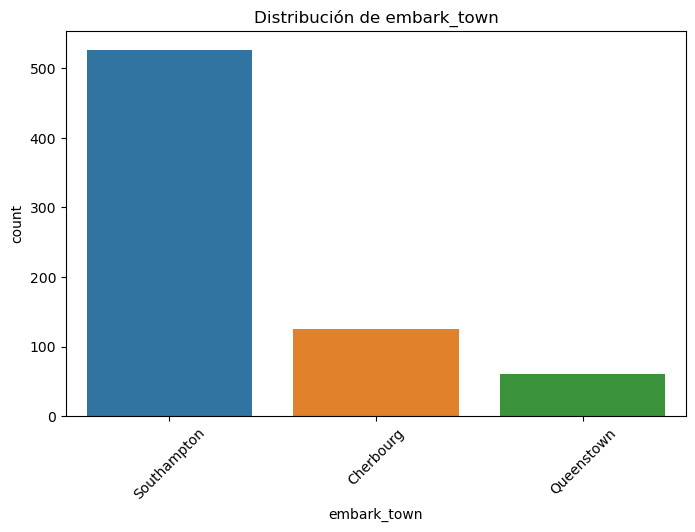

Frecuencia de categorías en embark_town:
embark_town
Southampton    527
Cherbourg      125
Queenstown      60
Name: count, dtype: int64

Porcentaje de categorías en embark_town:
embark_town
Southampton    74.02
Cherbourg      17.56
Queenstown      8.43
Name: proportion, dtype: float64

La moda es Southampton con una frecuencia de 527
Proporción de la moda: 74.02%



In [24]:
analisis_univariable_categoricas(train_set,columns_cat)

##### Numéricas

Para pclass
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


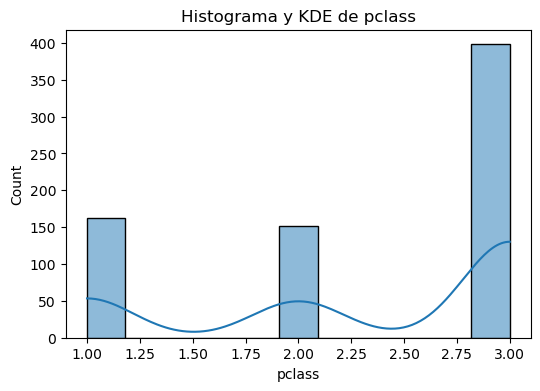

count    712.00
mean       2.33
std        0.82
min        1.00
25%        2.00
50%        3.00
75%        3.00
max        3.00
Name: pclass, dtype: float64

La moda es 3.00, el coeficiente de variación es 35.39% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: -0.68, valores extendidos a la izquierda

Curtosis: -1.20. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=88.81

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para age
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


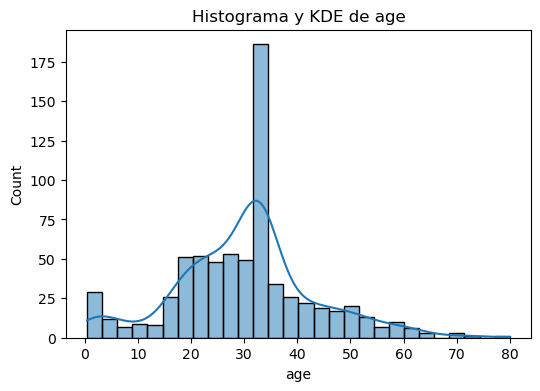

count    712.00
mean      30.15
std       13.06
min        0.42
25%       22.00
50%       31.86
75%       35.00
max       80.00
Name: age, dtype: float64

La moda es 33.18, el coeficiente de variación es 43.33% y el IQR es 13.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: 0.77. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=8.58

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 1 y suponen en proporción 0.14%

Para sibsp
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


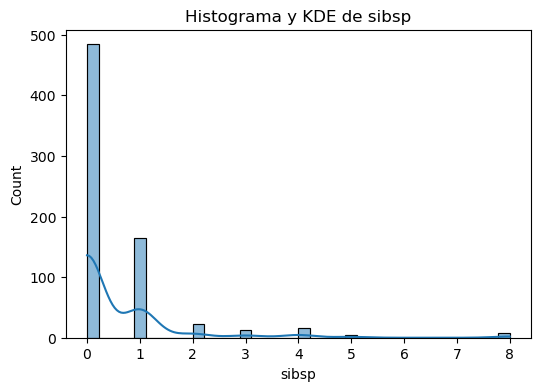

count    712.00
mean       0.55
std        1.18
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        8.00
Name: sibsp, dtype: float64

La moda es 0.00, el coeficiente de variación es 212.59% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.61, valores extendidos a la derecha

Curtosis: 16.38. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=119.32

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 12 y suponen en proporción 1.69%

La variable sibsp puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=16.38, asimetria=3.61

Para parch
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


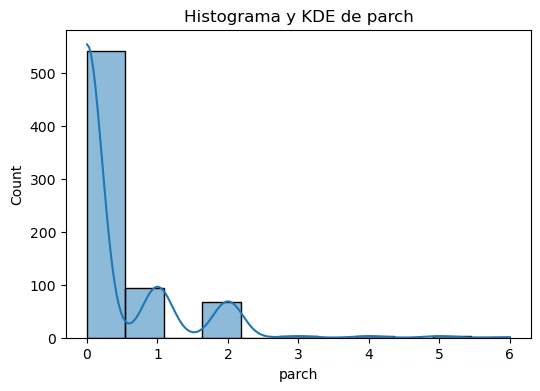

count    712.00
mean       0.38
std        0.79
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        6.00
Name: parch, dtype: float64

La moda es 0.00, el coeficiente de variación es 208.77% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 2.69, valores extendidos a la derecha

Curtosis: 9.59. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=140.45

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 171 y suponen en proporción 24.02%

La variable parch puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.59, asimetria=2.69

Para fare
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


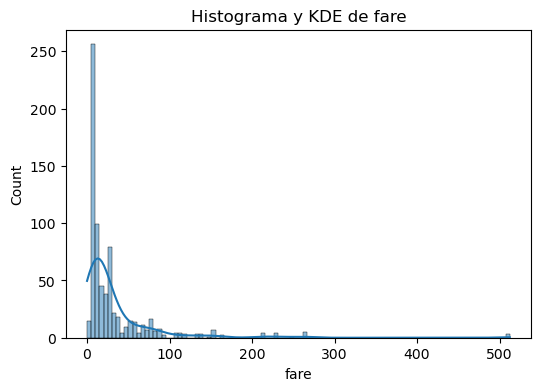

count    712.00
mean      32.59
std       51.97
min        0.00
25%        7.92
50%       14.45
75%       30.50
max      512.33
Name: fare, dtype: float64

La moda es 8.05, el coeficiente de variación es 159.48% y el IQR es 22.57

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 4.86, valores extendidos a la derecha

Curtosis: 33.44. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=101.76

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 44 y suponen en proporción 6.18%

La variable fare puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=33.44, asimetria=4.86

Para alone
*************************


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


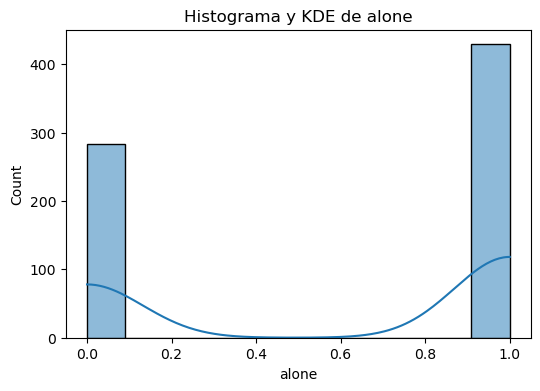

count    712.00
mean       0.60
std        0.49
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        1.00
Name: alone, dtype: float64

La moda es 1.00, el coeficiente de variación es 81.28% y el IQR es 1.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -1.82. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=134.94

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

features_log: ['sibsp', 'parch', 'fare']

features_no_log: ['pclass', 'age', 'alone']


,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
pclass,0.0,0.0,88.81,-0.68,-1.20,0.0,0.00,False
age,0.0,0.0,8.58,0.22,0.77,0.0,0.14,False
sibsp,0.0,0.0,119.32,3.61,16.38,0.0,1.69,True
parch,0.0,0.0,140.45,2.69,9.59,0.0,24.02,True
fare,0.0,0.0,101.76,4.86,33.44,0.0,6.18,True
alone,0.0,0.0,134.94,-0.42,-1.82,0.0,0.00,False


In [25]:
analisis_univariable_numericas(train_set,columns_num)

A la variable 'fare' habría que hacerle transformación logarítmica

#### Bivariable con target

##### Categórica con target

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


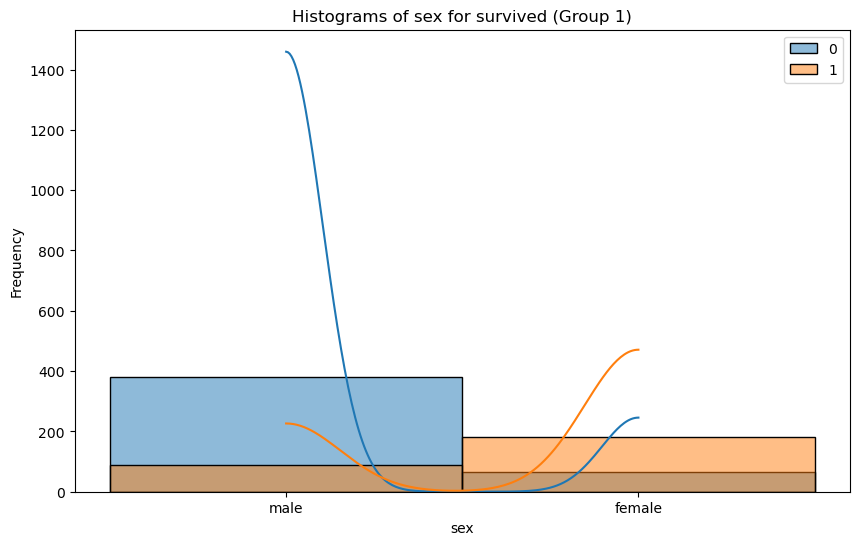

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


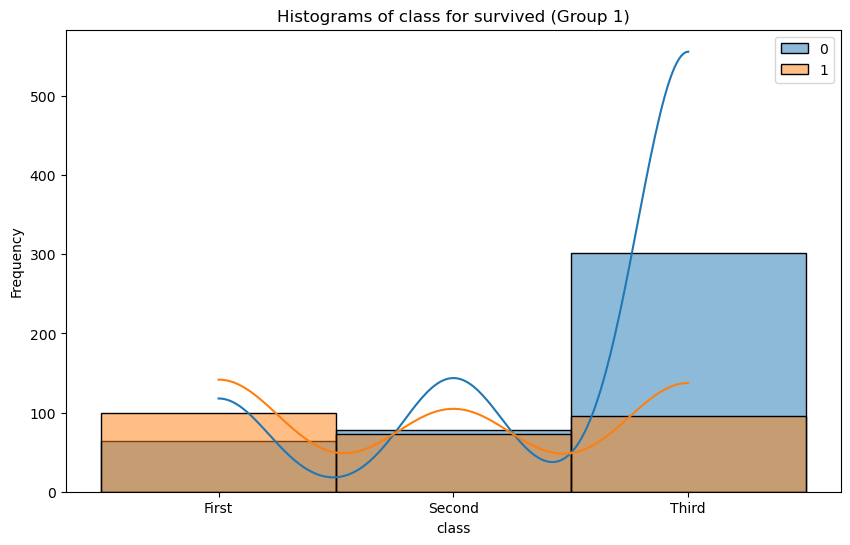

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


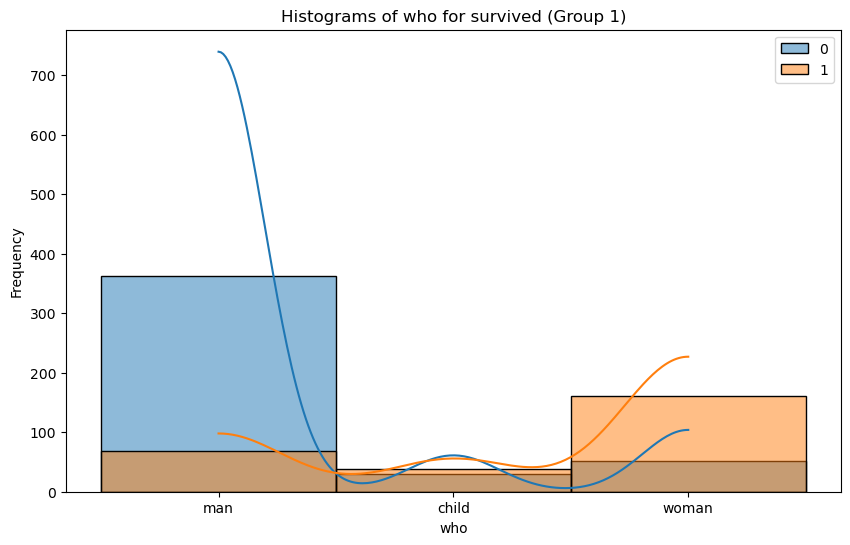

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


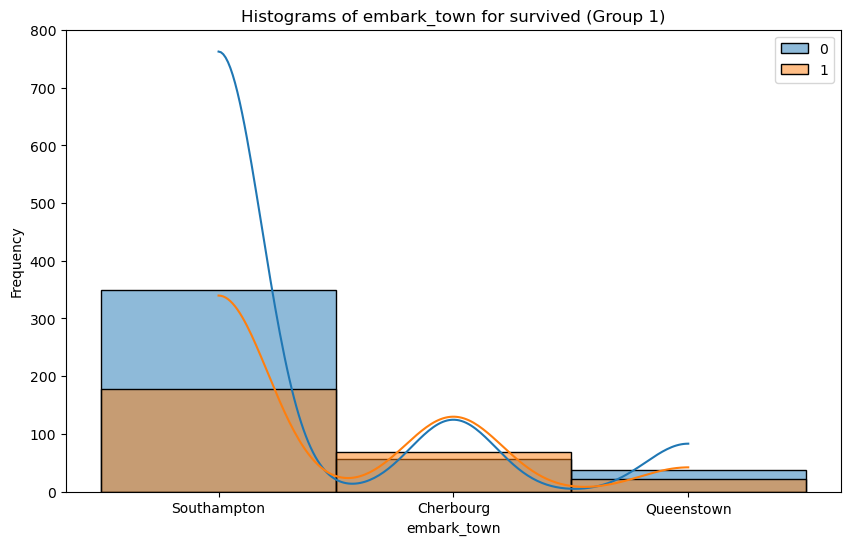

In [26]:
for x in columns_cat:
    plot_grouped_histograms(train_set,'survived',x, group_size=2)

##### Numéricas con target

Matriz de correlación con la variable target:
pclass   -0.321750
fare      0.246641
alone    -0.180542
parch     0.078311
age      -0.070407
sibsp    -0.047602
Name: survived, dtype: float64



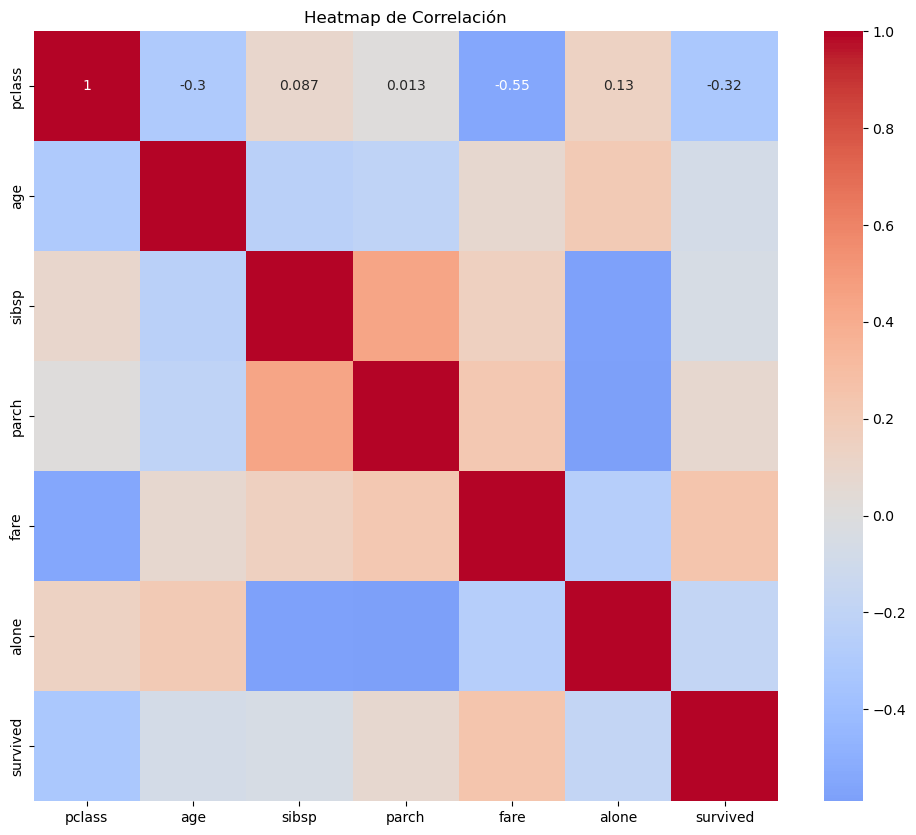

Variables con correlación por debajo del 20%: ['age', 'sibsp', 'parch', 'alone']
Variables con correlación por encima del 20%: ['pclass', 'fare', 'survived']

Prueba de correlación para pclass vs survived
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: -0.33
p-valor: 0.000
La variable pclass está significativamente asociada con survived (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación para age vs survived
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: -0.07
p-valor: 0.060
La variable age no está significativamente asociada con survived (p >= 0.05 o correlación < 0.2).

Prueba de correlación para sibsp vs survived
****************************************
Prueba de correlación (Spearman):
Estadístico de correlación: 0.07
p-valor: 0.065
La variable sibsp no está significativamente asociada con survived (p >= 0.05 o correlación < 0.2).

Prueba

{'significant_vars': ['pclass', 'fare'],
 'high_vif_vars': [],
 'high_corr_vars': [],
 'low_corr_vars': []}

In [27]:
analisis_bivariable_numericas_numerica(train_set,'survived',columns_num)

In [28]:
features_num_visual_first = ['pclass', 'fare']
features_num_visual_all = ['pclass', 'fare', 'age', 'sibsp', 'parch', 'alone']
features_cat_visual_first = ['sex', 'class', 'who', 'embark_town']
features_visual_final_first = features_num_visual_first + features_cat_visual_first

#### Tratamiento variables

Transformación logarítmica variable 'fare'

In [29]:
train_set['fare'] = train_set['fare'].apply(np.log1p)
test_set['fare'] = test_set['fare'].apply(np.log1p)

Tratamiento variables numéricas

In [30]:
# Tratamiento variables numéricas
min_max = MinMaxScaler()

train_set_scaled = min_max.fit_transform(train_set[columns_num])
test_set_scaled = min_max.transform(test_set[columns_num])

train_set_scaled = pd.DataFrame(train_set_scaled, columns=columns_num)
test_set_scaled = pd.DataFrame(test_set_scaled,columns=columns_num)


Tratamiento variables categóricas

In [31]:
# Tratamiento variables categóricas
ohe = OneHotEncoder()


train_set_ohe = ohe.fit_transform(train_set[columns_cat])
test_set_ohe = ohe.transform(test_set[columns_cat])

columns_ohe = ohe.get_feature_names_out(columns_cat)

# Convertir los resultados a DataFrames
train_set_ohe_df = pd.DataFrame(train_set_ohe.toarray(), columns=columns_ohe)
test_set_ohe_df = pd.DataFrame(test_set_ohe.toarray(), columns=columns_ohe)

In [32]:
train_set_trans = pd.concat([train_set_scaled,train_set_ohe_df],axis = 1)
test_set_trans = pd.concat([test_set_scaled,test_set_ohe_df],axis = 1)

In [33]:
train_set_trans

,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,0.566474,0.000,0.000000,0.542291,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.5,0.283740,0.000,0.000000,0.422864,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.396833,0.000,0.000000,0.350727,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.321438,0.125,0.000000,0.349451,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.070118,0.500,0.333333,0.556696,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.258608,0.000,0.000000,0.345712,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
708,0.0,0.411608,0.000,0.000000,0.555325,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
709,1.0,0.509927,0.250,0.000000,0.435071,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
710,0.0,0.170646,0.125,0.333333,0.768443,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### divido en X,y

In [34]:
X_train = train_set_trans
y_train= train_set['survived']
X_test = test_set_trans
y_test = test_set['survived']


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   179 non-null    float64
 1   age                      179 non-null    float64
 2   sibsp                    179 non-null    float64
 3   parch                    179 non-null    float64
 4   fare                     179 non-null    float64
 5   alone                    179 non-null    float64
 6   sex_female               179 non-null    float64
 7   sex_male                 179 non-null    float64
 8   class_First              179 non-null    float64
 9   class_Second             179 non-null    float64
 10  class_Third              179 non-null    float64
 11  who_child                179 non-null    float64
 12  who_man                  179 non-null    float64
 13  who_woman                179 non-null    float64
 14  embark_town_Cherbourg    1

In [36]:
for col_x,col_y in zip(X_train,X_test):
    if col_x == col_y:
        print(col_x, True)

pclass True
age True
sibsp True
parch True
fare True
alone True
sex_female True
sex_male True
class_First True
class_Second True
class_Third True
who_child True
who_man True
who_woman True
embark_town_Cherbourg True
embark_town_Queenstown True
embark_town_Southampton True


#### Selección de features

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif,k=10)

x_data_kbet = selector.fit_transform(X_train,y_train)
selector.get_feature_names_out()

array(['pclass', 'fare', 'alone', 'sex_female', 'sex_male', 'class_First',
       'class_Third', 'who_man', 'who_woman', 'embark_town_Cherbourg'],
      dtype=object)

In [38]:
features_kbest = selector.get_feature_names_out()

In [39]:
rf_sfs=RandomForestClassifier(max_depth=5,random_state=42)

sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=10,
    cv=5,
    scoring='roc_auc'
)

sfs_fordward.fit(X_train,y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          n_features_to_select=10, scoring='roc_auc')

In [40]:
sfs_fordward.get_feature_names_out()

array(['pclass', 'age', 'parch', 'fare', 'class_First', 'class_Second',
       'class_Third', 'who_man', 'embark_town_Cherbourg',
       'embark_town_Southampton'], dtype=object)

In [41]:
features_sfs= sfs_fordward.get_feature_names_out()

#### Modelado

Instancio los modelos

In [42]:
rf = RandomForestClassifier(max_depth=5,random_state=42)
mpl = MLPClassifier()

Entreno

In [43]:
rf.fit(X_train[features_sfs],y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Veo cuáles son las features más importantes.

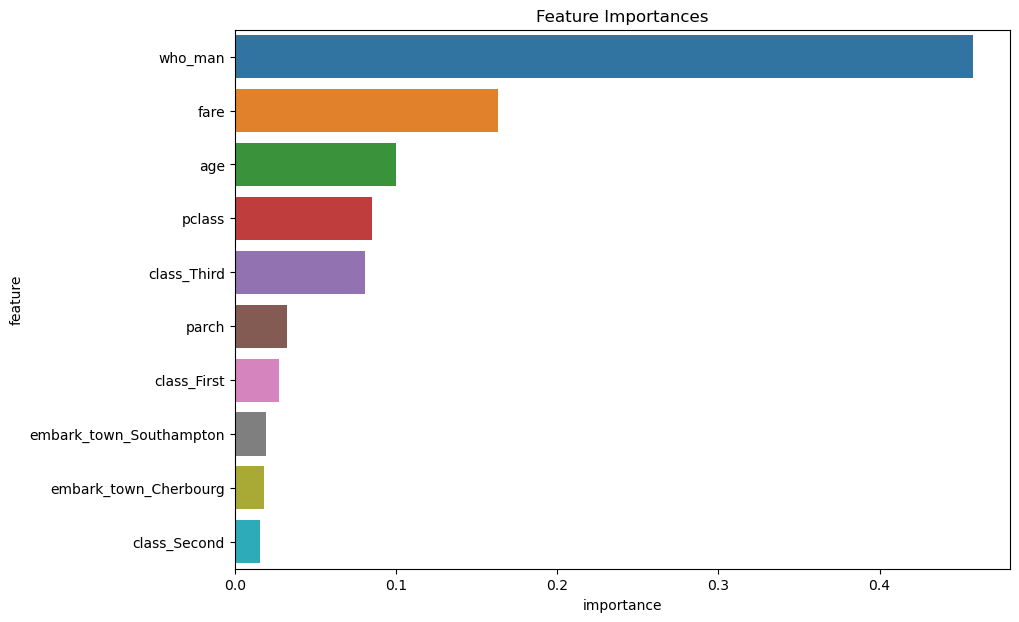

In [44]:

df_feature_importances = pd.DataFrame({'feature': X_train[features_sfs].columns, 'importance': rf.feature_importances_})
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=df_feature_importances)
plt.title('Feature Importances')
plt.show()

Parece ser que todas aportan al modelo. Solo he escogido 10 features de primeras. Habría que probar a coger alguna más.

In [45]:
from sklearn.metrics import roc_auc_score
y_predict_rf = rf.predict(X_train[features_sfs])

roc_auc_score(y_train,y_predict_rf)

0.821147640177491

Optimización hiperparámetros Random Forest

In [47]:
import time
param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5,10,50,100,None],
    "min_samples_leaf": [10,20,50,100],
    "class_weight": ["balanced",None],
    "max_features": ["sqrt","log2",None]
}

rf_grid = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

start = time.time()
rf_grid.fit(X_train[features_sfs],y_train)
end = time.time()

train_time_rf_grid = end - start


start = time.time()
y_predict_rf_grid = rf_grid.predict(X_test[features_sfs])
end=time.time()

pred_time_rf_grid = end-start

rf_grid_metrics = pd.DataFrame(
    {'accuracy': accuracy_score(y_test, y_predict_rf_grid),
                            'precision': precision_score(y_test, y_predict_rf_grid, average = "macro"),
                            'recall': recall_score(y_test, y_predict_rf_grid, average = "macro"),
                            'auc': roc_auc_score(y_test, y_predict_rf_grid),
                            'train_time': train_time_rf_grid,
                            'pred_time': pred_time_rf_grid}, index=['Random_Forest']
                            )

rf_grid_metrics



,accuracy,precision,recall,auc,train_time,pred_time
Random_Forest,0.798883,0.792476,0.794659,0.794659,132.988506,0.01859


In [48]:
rf_grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 5,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(max_depth=5, random_state=42),
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 200],
  'max_depth': [5, 10, 50, 100, None],
  'min_samples_leaf': [10, 20, 50, 100],
  'class_weight': ['balanced', None],
  'max_features': ['sqrt', 'log2', None]},
 'pre_dispatch': '2*n_jobs',
 'refit': True

In [49]:
y_pred_proba_rf = rf_grid.predict_proba(X_test[features_sfs])[:,1]

#### Modelo MLP


In [50]:
# Creamos un modelo de red neuronal

mlp = MLPClassifier(hidden_layer_sizes=(100, 100,100),
                    activation='relu',
                    solver = 'adam',
                    max_iter=1000,
                    random_state=42,
                    learning_rate_init=0.1,
                    batch_size=32)

# Registramos el tiempo de entrenamiento y predicción
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()

train_time = end - start

start = time.time()
y_pred = mlp.predict(X_test)
end = time.time()

pred_time = end - start

# Guardamos las métricas de evaluación en un dataframe

mlp_metrics = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                            'precision': precision_score(y_test, y_pred, average = "macro"),
                            'recall': recall_score(y_test, y_pred, average = "macro"),
                            'auc': roc_auc_score(y_test, y_pred),
                            'train_time': train_time,
                            'pred_time': pred_time}, index=['mlp']
                            )
mlp_metrics.head()

,accuracy,precision,recall,auc,train_time,pred_time
mlp,0.776536,0.820994,0.737709,0.737709,1.004125,0.004979


In [51]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 32,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [52]:
y_pred_proba_mlp = mlp.predict_proba(X_test)[:,1]

#### Comparación entre modelos

In [53]:
df_comparacion = pd.concat([rf_grid_metrics,mlp_metrics],axis=0)
df_comparacion

,accuracy,precision,recall,auc,train_time,pred_time
Random_Forest,0.798883,0.792476,0.794659,0.794659,132.988506,0.018590
mlp,0.776536,0.820994,0.737709,0.737709,1.004125,0.004979


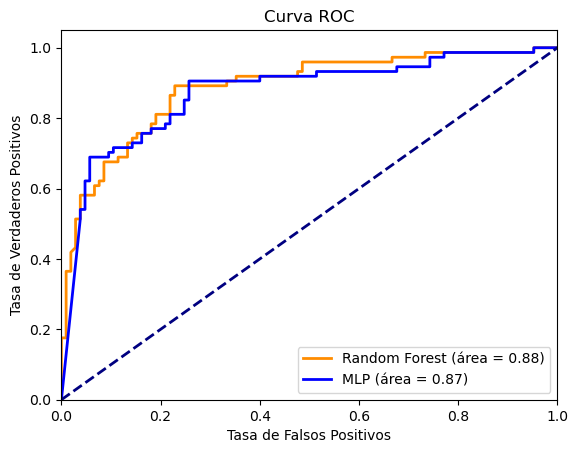

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_rf)
roc_auc = auc(fpr, tpr)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test,y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (área = %0.2f)' % roc_auc)
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP (área = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

___

Probando Random Forest con features_kbest

In [58]:
param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5,10,50,100,None],
    "min_samples_leaf": [10,20,50,100],
    "class_weight": ["balanced",None],
    "max_features": ["sqrt","log2",None]
}

rf_grid_kbest = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

start = time.time()
rf_grid_kbest.fit(X_train[features_kbest],y_train)
end = time.time()

train_time_rf_grid = end - start


start = time.time()
y_predict_rf_grid_kbest = rf_grid_kbest.predict(X_test[features_kbest])
end=time.time()

pred_time_rf_grid = end-start

rf_grid_metrics_kbest = pd.DataFrame(
    {'accuracy': accuracy_score(y_test, y_predict_rf_grid_kbest),
                            'precision': precision_score(y_test, y_predict_rf_grid_kbest, average = "macro"),
                            'recall': recall_score(y_test, y_predict_rf_grid_kbest, average = "macro"),
                            'auc': roc_auc_score(y_test, y_predict_rf_grid_kbest),
                            'train_time': train_time_rf_grid,
                            'pred_time': pred_time_rf_grid}, index=['Random_Forest_kbest']
                            )

rf_grid_metrics_kbest

,accuracy,precision,recall,auc,train_time,pred_time
Random_Forest_kbest,0.804469,0.799361,0.795431,0.795431,157.648184,0.033851


____

### Con Pipeline por partes

In [62]:
df_copy = df.copy()

In [ ]:
cat_pipeline = Pipeline(
    [("Imputer_mode", SimpleImputer(strategy='most_frequent')),
     ('OneHotEncoder', OneHotEncoder())]
)


num_pipeline = Pipeline(
    [('Impute_mean',SimpleImputer(strategy='mean')),
     ('Mix_Max', MinMaxScaler())]
)

preprocesing = ColumnTransformer(
    [('Numeric', num_pipeline, columns_num),
     ('Categorical', cat_pipeline,columns_cat)],
     remainder='passthrough', verbose_feature_names_out=False
)

In [ ]:
pipe_preprocess = preprocesing.fit_transform(df_copy)

In [ ]:
df_final = pd.DataFrame(pipe_preprocess, columns=preprocesing.get_feature_names_out())
df_final.head(8)

,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,survived
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.321438,0.000,0.000000,0.015469,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,0.434531,0.125,0.000000,0.103644,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.367921,0.000,0.000000,0.016510,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.673285,0.000,0.000000,0.101229,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.019854,0.375,0.166667,0.041136,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   891 non-null    float64
 1   age                      891 non-null    float64
 2   sibsp                    891 non-null    float64
 3   parch                    891 non-null    float64
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    float64
 6   sex_female               891 non-null    float64
 7   sex_male                 891 non-null    float64
 8   class_First              891 non-null    float64
 9   class_Second             891 non-null    float64
 10  class_Third              891 non-null    float64
 11  who_child                891 non-null    float64
 12  who_man                  891 non-null    float64
 13  who_woman                891 non-null    float64
 14  embark_town_Cherbourg    8

Lo junto todo metiéndolo dentro del modelo.  
Quedaría la parte de la transformación logarítmica de la variable 'fare' y la selección de features.

In [60]:
print('col. categóricas', columns_cat)
print()
print('col. numéricas', columns_num)
print()
print('col. eliminar', columns_exclude)

col. categóricas ['sex', 'class', 'who', 'embark_town']

col. numéricas ['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone']

col. eliminar ['deck', 'embarked', 'alive', 'adult_male']


In [68]:
X = df_copy.drop(columns='survived')
y = df_copy['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

columns_num_pipe = X_train.select_dtypes(include=(['int','float','bool'])).columns.tolist()
columns_cat_pipe = X_train.select_dtypes(include=(['object'])).columns.tolist()
columns_eliminar_pipe = ['deck', 'embarked', 'alive', 'adult_male']

for col in columns_num + columns_cat:
    if col not in X_train.columns:
        print(f"Error: La columna '{col}' no está presente en X_train")


cat_pipeline = Pipeline(
    [("Imputer_mode", SimpleImputer(strategy='most_frequent')),
     ('OneHotEncoder', OneHotEncoder())]
)


num_pipeline = Pipeline(
    [('Impute_mean',SimpleImputer(strategy='mean')),
     ('Mix_Max', MinMaxScaler())]
)

preprocesing = ColumnTransformer(
    [('Numeric', num_pipeline, columns_num_pipe),
     ('Categorical', cat_pipeline,columns_cat_pipe)],
     remainder='passthrough', verbose_feature_names_out=False
)

pipeline = Pipeline([
    ('preprocesing', preprocesing),
    ('classifier', RandomForestClassifier())
])


param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight':['balanced']
}

# Configurar GridSearchCV
rf_pipe = GridSearchCV(pipeline,
                        param_grid,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        error_score='raise')

# Entrenar el modelo con GridSearchCV
start = time.time()
rf_pipe.fit(X_train, y_train) # Lo hago sobre toda las columnas
end = time.time()

train_time_rf_pipe = end - start

# Obtener los mejores hiperparámetros
best_params = rf_pipe.best_params_
print("Mejores hiperparámetros:", best_params)

# Predecir con el mejor modelo
start = time.time()
y_pred_pipe = rf_pipe.predict(X_test)
end = time.time()

pred_time_pipe = end - start

# Predecir son la probablidad
y_pred_rf_pipe_proba = rf_pipe.predict_proba(X_test)[:,1]

rf_grid_metrics_pipe = pd.DataFrame(
    {'accuracy': accuracy_score(y_test, y_pred_pipe),
                            'precision': precision_score(y_test, y_pred_pipe, average = "macro"),
                            'recall': recall_score(y_test, y_pred_pipe, average = "macro"),
                            'auc': roc_auc_score(y_test, y_pred_pipe),
                            'train_time': train_time_rf_pipe,
                            'pred_time': pred_time_pipe}, index=['Random_Forest_pipe']
                            )

rf_grid_metrics_pipe

Mejores hiperparámetros: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


,accuracy,precision,recall,auc,train_time,pred_time
Random_Forest_pipe,0.837989,0.832692,0.833977,0.833977,87.943315,0.042222


___

### Comparación final

In [69]:
df_comparacion_final = pd.concat([df_comparacion,rf_grid_metrics_kbest,rf_grid_metrics_pipe],axis=0)
df_comparacion_final

,accuracy,precision,recall,auc,train_time,pred_time
Random_Forest,0.798883,0.792476,0.794659,0.794659,132.988506,0.018590
mlp,0.776536,0.820994,0.737709,0.737709,1.004125,0.004979
Random_Forest_kbest,0.804469,0.799361,0.795431,0.795431,157.648184,0.033851
Random_Forest_pipe,0.837989,0.832692,0.833977,0.833977,87.943315,0.042222


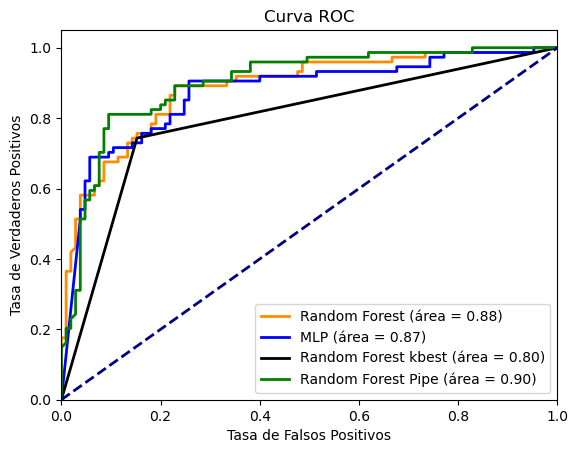

In [70]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test,y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_kbest, tpr_kbest, thresholds_kbest = roc_curve(y_test,y_predict_rf_grid_kbest)
roc_auc_kbest = auc(fpr_kbest, tpr_kbest)

fpr_pipe, tpr_pipe, thresholds_pipe = roc_curve(y_test,y_pred_rf_pipe_proba)
roc_auc_pipe = auc(fpr_pipe, tpr_pipe)

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (área = %0.2f)' % roc_auc)
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP (área = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_kbest, tpr_kbest, color='black', lw=2, label='Random Forest kbest (área = %0.2f)' % roc_auc_kbest)
plt.plot(fpr_pipe, tpr_pipe, color='green', lw=2, label='Random Forest Pipe (área = %0.2f)' % roc_auc_pipe)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Parece que el que mejor resultado da es el Random Forest con la metodología pipeline y todas las variables.

____

ESta parte no la pude terminar, estuvo ejecutándose tres horas y al final lo quité.

### Con Pipeline todo unido

In [ ]:


# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas a excluir
columns_exclude = ['deck', 'embarked', 'alive','adult_male']

# Definir las columnas categóricas y numéricas
categorical_columns = ['sex', 'class', 'who', 'embark_town']
numerical_columns = ['age', 'sibsp', 'parch']
log_transform_columns = ['fare']

# Crear pipelines para datos categóricos y numéricos
cat_pipeline = Pipeline(
    [("Imputer_mode", SimpleImputer(strategy='most_frequent')),
     ('OneHotEncoder', OneHotEncoder())]
)

num_pipeline = Pipeline(
    [('Impute_mean', SimpleImputer(strategy='mean')),
     ('Mix_Max', MinMaxScaler())]
)

log_pipeline = Pipeline(
    [('Impute_mean', SimpleImputer(strategy='mean')),
     ('Log_Transform', FunctionTransformer(np.log1p))]
)

# Crear el ColumnTransformer
preprocessing = ColumnTransformer(
    [('Numeric', num_pipeline, numerical_columns),
     ('Categorical', cat_pipeline, categorical_columns),
     ('Log', log_pipeline, log_transform_columns)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Crear el pipeline completo con el RandomForestClassifier
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('feature_selection', SequentialFeatureSelector(RandomForestClassifier(max_depth=5), n_features_to_select=10, cv=5, scoring='roc_auc')),
    ('classifier', RandomForestClassifier())
])

# Definir los hiperparámetros a optimizar
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5,10,50,100,None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [10,20,50,100],
    'classifier__class_weight': ["balanced",None],
    'classifier__max_features': ["sqrt","log2",None]
}

# Crear el GridSearchCV
rf_grid_pipe = GridSearchCV(pipeline,
                            param_grid,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs = -1)

# Ajustar el GridSearchCV a los datos de entrenamiento
start = time.time()
rf_grid_pipe.fit(X_train, y_train)
end = time.time()

train_rf_pipe = end - start

# Predecir y evaluar el modelo con los mejores hiperparámetros
start = time.time()
y_pred_rf_pipe = rf_grid_pipe.predict(X_test)
end = time.time()

pred_rf_pipe = end - start

rf_grid_pipe_df = pd.DataFrame(
    {'accuracy': accuracy_score(y_test, y_pred_rf_pipe),
     'precision': precision_score(y_test, y_pred_rf_pipe, average="macro"),
     'recall': recall_score(y_test, y_pred_rf_pipe, average="macro"),
     'auc': roc_auc_score(y_test, y_pred_rf_pipe),
     'train_time': train_rf_pipe,
     'pred_time': pred_rf_pipe}, index=['Random_Forest_pipe']
)

print(rf_grid_pipe_df)

